In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

dataset = pd.read_csv('../data/dataset.csv')

# Посмотрим базовую информацию и пропуски
dataset.info()
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# Заполним пропуски
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [19]:
# Перевод категориальных колонок в числа
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [20]:
# Разделяем данные на признаки (X) и цель (y)
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

from sklearn.model_selection import train_test_split

# Делим на обучающую и тестовую выборки (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression

# Обучаем модель логистической регрессии
# max_iter увеличено, чтобы модель точно сошлась
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Предсказываем классы для тестовой выборки
y_pred = model.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.8156424581005587
Precision: 0.7971014492753623
Recall: 0.7432432432432432
F1: 0.7692307692307693


In [22]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf)

Confusion matrix:
 [[91 14]
 [19 55]]


ROC-AUC: 0.8943371943371943


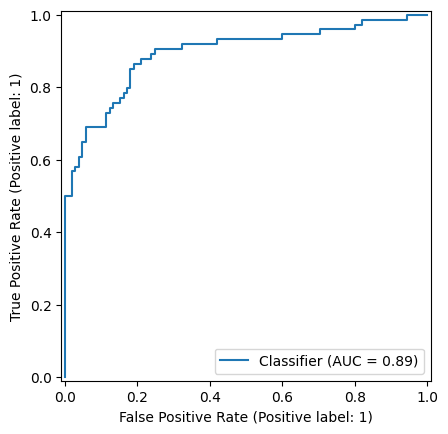

In [23]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Предсказанные вероятности выживания
y_proba = model.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Построение ROC-кривой
RocCurveDisplay.from_predictions(y_test, y_proba)

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.2, 0.5, 0.8]

for t in thresholds:
    preds = (y_proba >= t).astype(int)

    print(
        f"Threshold={t}: "
        f"Precision={precision_score(y_test, preds):.3f}, "
        f"Recall={recall_score(y_test, preds):.3f}, "
        f"F1={f1_score(y_test, preds):.3f}"
    )

Threshold=0.2: Precision=0.642, Recall=0.919, F1=0.756
Threshold=0.5: Precision=0.797, Recall=0.743, F1=0.769
Threshold=0.8: Precision=1.000, Recall=0.419, F1=0.590


In [25]:
print(
    "Вывод:\n"
    "- Логистическая регрессия показывает адекватные результаты.\n"
    "- При пороге 0.2 Recall высокий → модель ловит больше выживших, но точность падает.\n"
    "- При пороге 0.8 Precision высокий → меньше ошибок, но много пропущенных.\n"
    "- Порог 0.5 является сбалансированным решением.\n"
)


Вывод:
- Логистическая регрессия показывает адекватные результаты.
- При пороге 0.2 Recall высокий → модель ловит больше выживших, но точность падает.
- При пороге 0.8 Precision высокий → меньше ошибок, но много пропущенных.
- Порог 0.5 является сбалансированным решением.



In [26]:
# лр 3
import pandas as pd

dataset = pd.read_csv('../data/dataset.csv')
dataset.head()

# Фиксируем базовую метрику (F1 и ROC-AUC до оптимизации)
from sklearn.metrics import f1_score, roc_auc_score

# Предсказания из Лабы 2
base_f1 = f1_score(y_test, y_pred)
base_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Базовый F1:", base_f1)
print("Базовый ROC-AUC:", base_auc)

Базовый F1: 0.7692307692307693
Базовый ROC-AUC: 0.8943371943371943


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Гиперпараметры для подбора
param_dist = {
    'C': np.logspace(-3, 3, 30),
    'penalty': ['l2', 'none'],
    'solver': ['lbfgs', 'newton-cg', 'saga']
}

# Модель для поиска (исходную model не трогаем)
search_model = LogisticRegression(max_iter=5000)

# RandomizedSearchCV — ≥15 итераций
search = RandomizedSearchCV(
    estimator=search_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Лучшие параметры:", search.best_params_)

C:\Users\User\PycharmProjects\ml_labs\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\PycharmProjects\ml_labs\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\PycharmProjects\ml_labs\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\User\PycharmProjects\ml_labs

Лучшие параметры: {'solver': 'newton-cg', 'penalty': 'l2', 'C': np.float64(92.36708571873865)}


In [28]:
# Лучшая модель из поиска
best_model = search.best_estimator_

# Предсказания и вероятности
best_pred = best_model.predict(X_test)
best_proba = best_model.predict_proba(X_test)[:, 1]

# Метрики "после"
best_f1 = f1_score(y_test, best_pred)
best_auc = roc_auc_score(y_test, best_proba)

print("Новый F1:", best_f1)
print("Новый ROC-AUC:", best_auc)

Новый F1: 0.7832167832167832
Новый ROC-AUC: 0.9043758043758043


In [29]:
print("Сравнение качества:")
print(f"F1:      было {base_f1:.4f} → стало {best_f1:.4f}")
print(f"ROC-AUC: было {base_auc:.4f} → стало {best_auc:.4f}")

Сравнение качества:
F1:      было 0.7692 → стало 0.7832
ROC-AUC: было 0.8943 → стало 0.9044


In [30]:
print(
    "Вывод:\n"
    f"- Базовый F1: {base_f1:.4f}, после оптимизации: {best_f1:.4f}.\n"
    f"- Базовый ROC-AUC: {base_auc:.4f}, после оптимизации: {best_auc:.4f}.\n"
    "- Оптимизация гиперпараметров улучшила модель.\n"
    "- Наибольшее влияние оказали параметры регуляризации (C и solver).\n"
    "- Подобранное значение C лучше балансирует переобучение/недообучение.\n"
    "- Новые параметры дают более высокое качество, поэтому модель после оптимизации предпочтительнее."
)

Вывод:
- Базовый F1: 0.7692, после оптимизации: 0.7832.
- Базовый ROC-AUC: 0.8943, после оптимизации: 0.9044.
- Оптимизация гиперпараметров улучшила модель.
- Наибольшее влияние оказали параметры регуляризации (C и solver).
- Подобранное значение C лучше балансирует переобучение/недообучение.
- Новые параметры дают более высокое качество, поэтому модель после оптимизации предпочтительнее.
